In [ ]:
#
# POC
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from IPython.display import HTML
import time
%matplotlib widget

N_PARTICLES = 50


# Initialize the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
sc = ax.scatter([], [])


def init():
    sc.set_offsets([])
    return sc,

def animate(frame):
    x = np.random.rand(N_PARTICLES) * 10  # Generate 5 random x coordinates
    y = np.random.rand(N_PARTICLES) * 10  # Generate 5 random y coordinates
    sc.set_offsets(np.c_[x, y])  # Update scatter plot data
    return sc,

# init()
ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=100)
HTML(ani.to_jshtml())

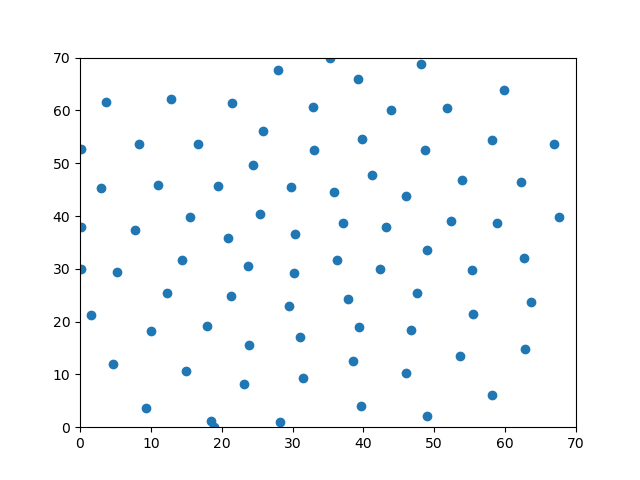

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from IPython.display import HTML
import time
import math
%matplotlib widget

N_PARTICLES = 80
PERCEPTION = 10
FRAMES = 100
D = 70
d_t = 20

# pool = np.random.rand(N_PARTICLES, 2) * D / 2 + D / 4
# pool = np.random.rand(N_PARTICLES, 2) * D
pool = np.random.uniform(low=20, high=D-20, size=(N_PARTICLES, 2))
# pool = np.random.normal(loc=D/2, scale=10, size=(N_PARTICLES, 2))
# pool = np.random.normal(loc=D/2, scale=1, size=(N_PARTICLES, 2))
# pool = np.random.exponential(scale=1.0, size=(N_PARTICLES, 2))
# pool = np.random.poisson(lam=5, size=(N_PARTICLES, 2))
# pool = np.random.binomial(n=10, p=0.5, size=(N_PARTICLES, 2))
# pool = np.random.beta(a=2, b=5, size=(N_PARTICLES, 2))
# pool = np.random.chisquare(df=2, size=(N_PARTICLES, 2))


def update(): 
    for i, curr in enumerate(pool):
        displacement = np.zeros(2)  # Initialize a zero displacement vector

        for j, other in enumerate(pool):
            if i == j:
                continue

            diff = other - curr
            dist = np.linalg.norm(diff)
            
            if dist < PERCEPTION and dist > 0:  # Check if the distance is within the perception range and not zero
                # Calculate repulsion force (inverse proportional to distance to avoid merging)
                repulsion = (PERCEPTION - dist) / dist * diff

                # Accumulate the displacement to move the particle away
                displacement -= repulsion / d_t

        # Update the position after summing up all repulsions
        pool[i] = (curr + displacement) % D

        # Correct position if it goes negative due to modulus
        pool[i, 0] = (pool[i, 0] + D) % D
        pool[i, 1] = (pool[i, 1] + D) % D


# Initialize the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, D)
ax.set_ylim(0, D)
sc = ax.scatter([], [])

def animate(frame):
    # print("Frame", frame)
    update()
    sc.set_offsets(pool)  # Update scatter plot data
    return sc,

ani = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=d_t)
HTML(ani.to_jshtml())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from IPython.display import HTML
import time
import math
%matplotlib widget

N_PARTICLES = 80
PERCEPTION = 10
FRAMES = 100
D = 70
d_t = 20

pool = np.random.uniform(low=20, high=D-20, size=(N_PARTICLES, 2))

def update(): 
    for i, curr in enumerate(pool):
        displacement = np.zeros(2)  # Initialize a zero displacement vector

        for j, other in enumerate(pool):
            if i == j:
                continue

            diff = other - curr
            dist = np.linalg.norm(diff)
            
            if dist < PERCEPTION and dist > 0:  # Check if the distance is within the perception range and not zero
                # Calculate repulsion force (inverse proportional to distance to avoid merging)
                repulsion = (PERCEPTION - dist) / dist * diff

                # Accumulate the displacement to move the particle away
                displacement -= repulsion / d_t

        # Update the position after summing up all repulsions
        pool[i] = (curr + displacement) % D

        # Correct position if it goes negative due to modulus
        pool[i, 0] = (pool[i, 0] + D) % D
        pool[i, 1] = (pool[i, 1] + D) % D


# Initialize the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, D)
ax.set_ylim(0, D)
sc = ax.scatter([], [])

def animate(frame):
    # print("Frame", frame)
    update()
    sc.set_offsets(pool)  # Update scatter plot data
    return sc,

ani = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=d_t)
HTML(ani.to_jshtml())

In [ ]:
coords = np.random.uniform(low=20, high=D-20, size=(10, 2))
colors = np.random.randint(0, 2, 10)

parts = np.c_[coords, colors]
print(coords, colors)
print(parts)